<a href="https://colab.research.google.com/github/elifecedogan/Asil-Lab/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

**Veriye İlk Bakış**

In [3]:

df = pd.read_csv('creditcard.csv')

print(df.head())
print(df['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Hedef değişken olan Class sütununda, dolandırıcılık işlemleri (1) ve normal işlemler (0) yer almaktadır. Tabloya baktığımızda bu sütunun ortalama değerinin 0.0017 olduğunu görüyoruz, bu da veri setindeki dolandırıcılık işlemlerinin oranının oldukça düşük olduğunu ve verinin dengesiz bir yapıya sahip olduğunu gösteriyor. Bu durum, model oluşturma aşamasında sınıf dengesizliği sorunlarına dikkat etmemiz gerektiğini ortaya koyuyor.

Amount sütununda, işlemlerin minimum tutarının 0, maksimum tutarının ise 25,691 olduğu görülmektedir. İşlem tutarlarının geniş bir aralığı kapsaması ve standart sapmanın oldukça yüksek (250.12) olması, işlemler arasında önemli farklılıklar bulunduğunu göstermektedir. Bu sütunun dağılımını incelediğimizde, ilerleyen aşamalarda özellik ölçeklendirme  işlemlerinin yapılması gerektiği sonucuna varabiliriz. Bu adım, model performansını artırmak ve daha tutarlı sonuçlar elde etmek adına kritik bir öneme sahiptir.

Time sütunu, işlemin gerçekleştiği andan itibaren geçen süreyi saniye cinsinden ifade etmektedir. Minimum değerin 0, maksimum değerin ise 172,792 olduğu görülmektedir. Bu, veri setinin iki gün boyunca toplanmış olduğunu doğrulamaktadır. Sütunun standart sapması 47,488 olup, işlemler arasında zaman açısından geniş bir dağılım olduğunu gösterir.

In [7]:
df.isna().sum().sum()

np.int64(0)

Veri setimizde herhangi bir eksik (null) değer bulunmamaktadır, bu da analizlerimiz için temiz bir veri setiyle çalıştığımızı göstermektedir. Bu durum, veriyi doldurma veya temizleme gibi ek adımlara gerek olmadığı anlamına gelir ve doğrudan veri analizi ve modelleme aşamalarına geçmemizi kolaylaştırır.

Normal İşlemler (0): 99.83 %
Dolandırıcılık (1): 0.17 %


/tmp/ipython-input-3678061078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=colors)


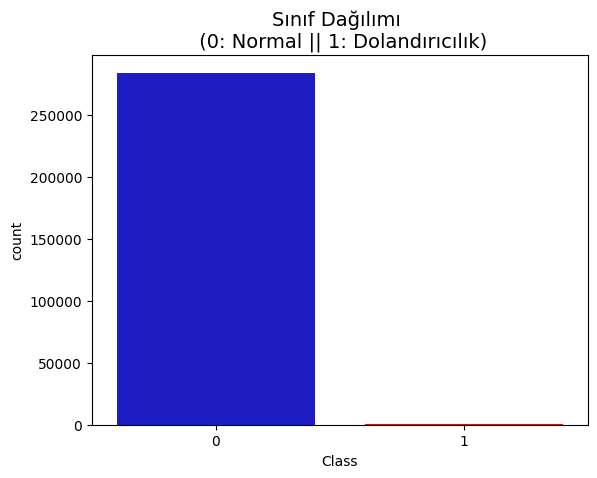

In [8]:

print('Normal İşlemler (0):', round(df['Class'].value_counts()[0]/len(df) * 100,2), '%')
print('Dolandırıcılık (1):', round(df['Class'].value_counts()[1]/len(df) * 100,2), '%')

colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Sınıf Dağılımı \n (0: Normal || 1: Dolandırıcılık)', fontsize=14)
plt.show()

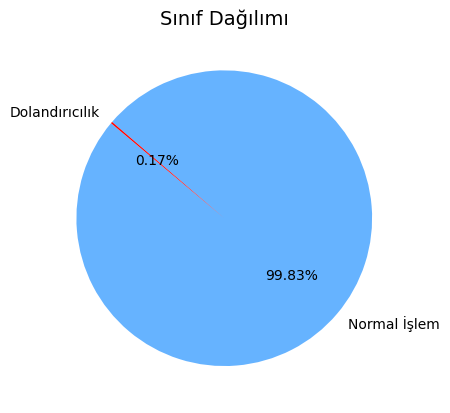

In [9]:
fraud_counts = df['Class'].value_counts(normalize=True)

labels = ['Normal İşlem', 'Dolandırıcılık']
plt.pie(fraud_counts, labels=labels, autopct='%1.2f%%', colors=['#66b3ff', 'red'], startangle=140)
plt.title('Sınıf Dağılımı', fontsize=14)
plt.show()


Veri setimiz aşırı dengesiz. Eğer bu veriyi doğrudan modele sokarsak, model "Her işlem normaldir" diyerek yüksek accuracy elde eder ama dolandırıcı yakalamakta başarısız olur. Bu dengesiz veri setini doğrudan tahmin modellerimiz ve analizlerimiz için kullanmak, algoritmanın işlemlerin çoğunlukla dolandırıcılık içermediğini varsaymasına neden olabilir ve bu durum overfit riskini artırabilir. Bu nedenle, modelleme sırasında bu dengesizlik dikkate alınmalı ve veri setindeki dengeyi sağlamak için uygun tekniklerin uygulanma ihtimali göz önünde bulundurulmalıdır.

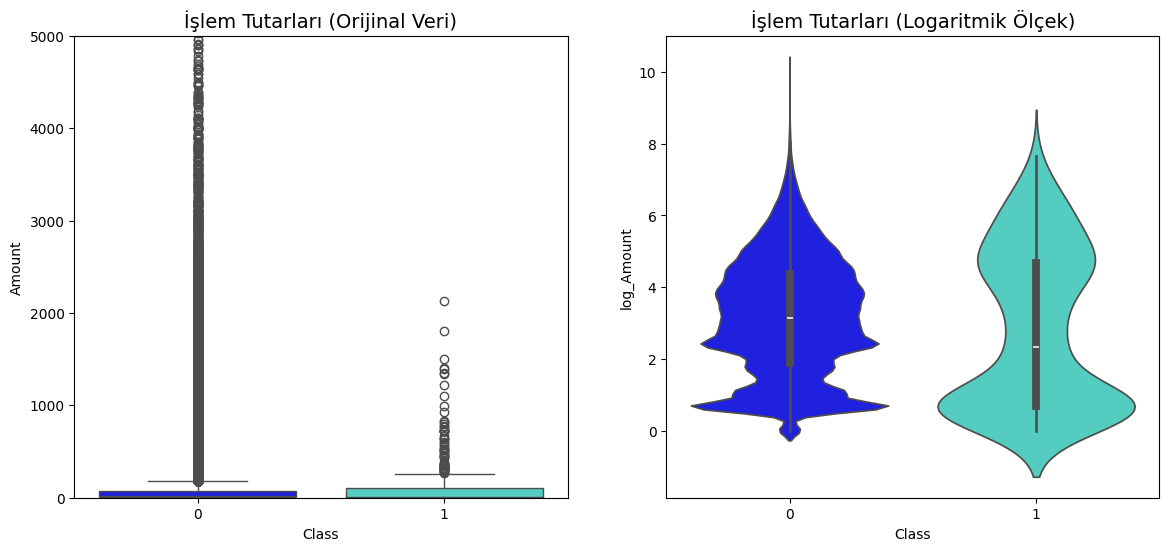

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_temp = pd.read_csv('creditcard.csv')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

df_temp['Class'] = df_temp['Class'].astype(str)

sns.boxplot(x="Class", y="Amount", data=df_temp, hue="Class", palette={"0": "blue", "1": "turquoise"})
plt.title("İşlem Tutarları (Orijinal Veri)", fontsize=14)
plt.ylim(0, 5000)

plt.subplot(1, 2, 2)

df_temp['log_Amount'] = np.log1p(df_temp['Amount'])

sns.violinplot(x="Class", y="log_Amount", data=df_temp, hue="Class", palette={"0": "blue", "1": "turquoise"})
plt.title("İşlem Tutarları (Logaritmik Ölçek)", fontsize=14)

plt.show()

**İşlem Tutarı (Amount) Değişkeninin Analizi**

Yukarıdaki Boxplot (Kutu Grafiği) ve Violin Plot (Keman Grafiği) üzerinden yaptığımız incelemeler sonucunda elde ettiğimiz kritik bulgular şunlardır:

* **Aykırı Değerlerin (Outliers) Varlığı:**
    Soldaki Boxplot'a baktığımızda, Amount sütununun çok geniş bir aralığa yayıldığını, ancak verilerin büyük çoğunluğunun çok küçük tutarlarda toplandığını görüyoruz. Grafiğin üstünde görünen siyah noktalar, veri setindeki **aşırı uç (outlier)** harcamaları temsil etmektedir.

* **Dağılım Farklılıkları:**
    Sağdaki Logaritmik Violin Plot, normal işlemler (Class 0) ile dolandırıcılık işlemleri (Class 1) arasındaki davranış farkını daha net gösteriyor. Dolandırıcılık işlemlerinin belirli tutar aralıklarında yoğunlaşması, bu değişkenin model için ayırt edici bir özellik olabileceğini işaret ediyor.

    Veri setimizde çok sayıda ve çok uçta outlier (aykırı değer) bulunduğu için, ortalamayı baz alan StandardScaler kullanmak veriyi bozabilir. Bu aykırı değerlerin etkisini minimize etmek ve modelin daha sağlıklı öğrenmesini sağlamak adına, medyan ve çeyrekler açıklığını kullanan **RobustScaler** yöntemini tercih etmemiz gerekmektedir.

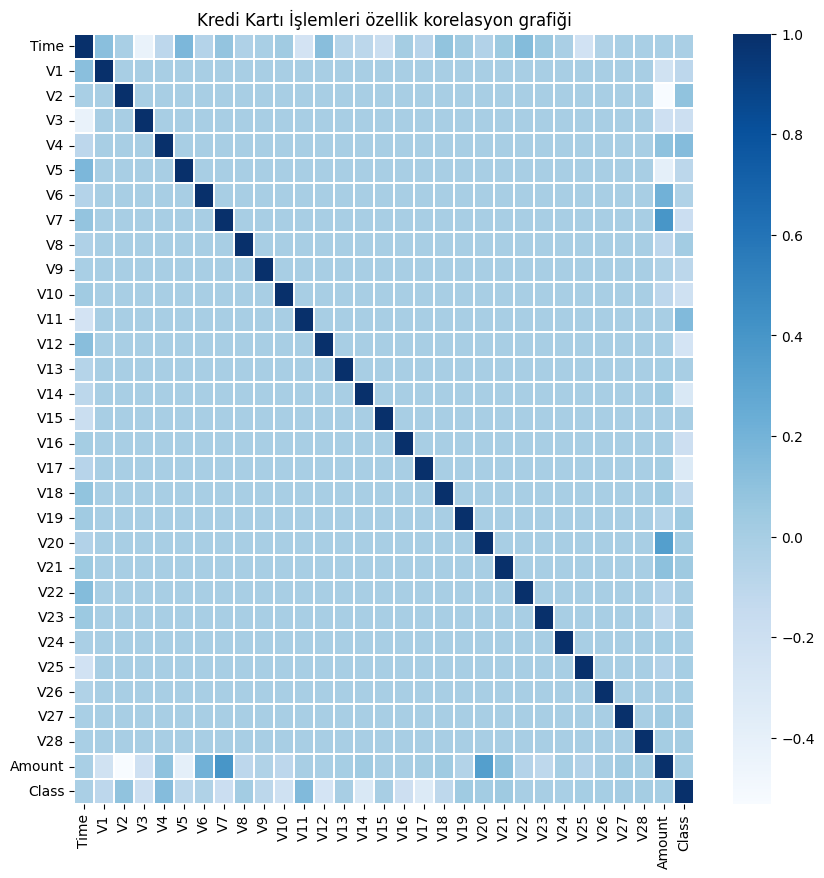

In [11]:

plt.figure(figsize = (10,10))
plt.title('Kredi Kartı İşlemleri özellik korelasyon grafiği')

# DÜZELTME: 'data_df' yerine 'df' kullanıyoruz
corr = df.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="Blues")
plt.show()

Korelasyon Matrisi Yorumu

Bu grafiğin büyük ölçüde nötr (renksiz) görünmesi beklenen bir durumdur ve bize hangi özelliğin dolandırıcılıkla ilişkili olduğunu henüz göstermez. Bunun iki basit sebebi vardır:

1.  Veri setindeki özellikler matematiksel olarak birbirinden bağımsız oluşturulmuştur.
2.  Dolandırıcılık işlemleri sayıca o kadar azdır ki, büyük resmin içinde kaybolmaktadır.

**Sonuç:** Gerçek ilişkileri ve dolandırıcıları ele veren ipuçlarını görebilmek için, bir sonraki adımda **dengelenmiş (eşitlenmiş) veri seti** üzerinde bu analizi tekrarlayacağız.

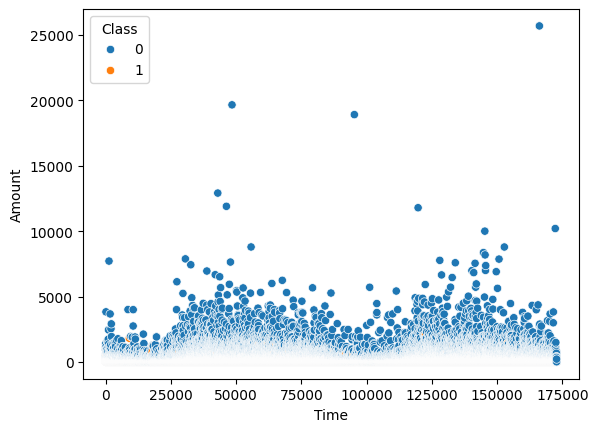

In [12]:
sns.scatterplot(data = df, x = 'Time', y = 'Amount', hue = 'Class') ;

Grafiği incelediğimizde, normal işlemlerin (Class 0) genellikle 5000 birimin altında yoğunlaştığını ve zamana düzenli bir şekilde yayıldığını; buna karşın turuncu ile gösterilen dolandırıcılık işlemlerinin (Class 1) oldukça seyrek kalarak veri setindeki dengesizliği doğruladığını görüyoruz. Dolandırıcılık işlemleri hem düşük hem de yüksek tutarlarda gerçekleşebilse de, genellikle normal işlemlerin arasına gizlenmiş durumdalar ve belirli bir zaman dilimine odaklanmak yerine günün her saatine dağılıyorlar. Bu durum, zaman ve miktar değişkenlerinin tek başına ayırt edici olmadığını gösterirken, dolandırıcılığın bu dağınık ve gizli yapısını tespit edebilmek için veri dengeleme (resampling) işleminin gerekliliğini ve özelliklerin bir bütün olarak analiz edilmesi gerektiğini ortaya koymaktadır.

/tmp/ipython-input-4172011076.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='navy')
/tmp/ipython-input-4172011076.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='blue')


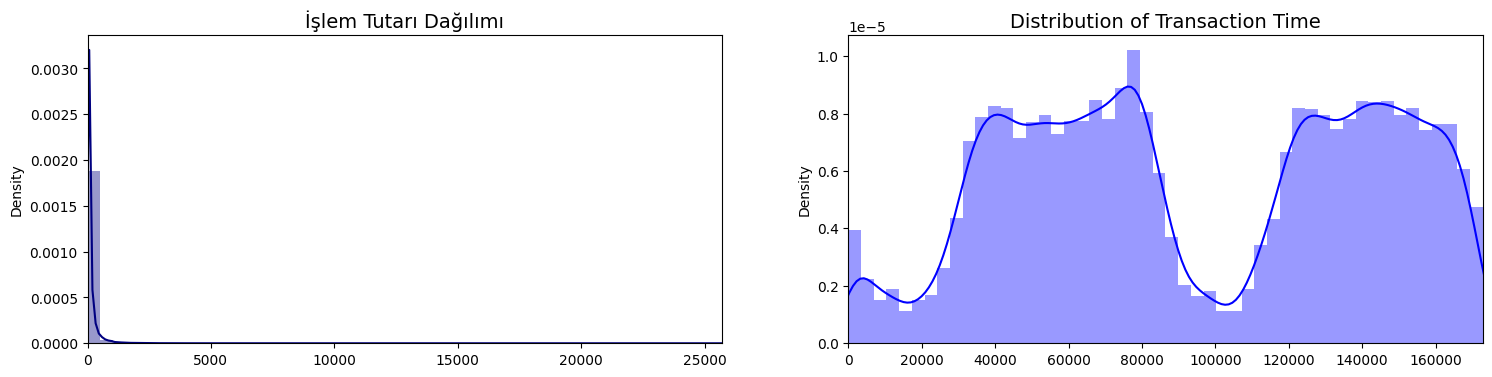

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='navy')
ax[0].set_title('İşlem Tutarı Dağılımı', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='blue')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

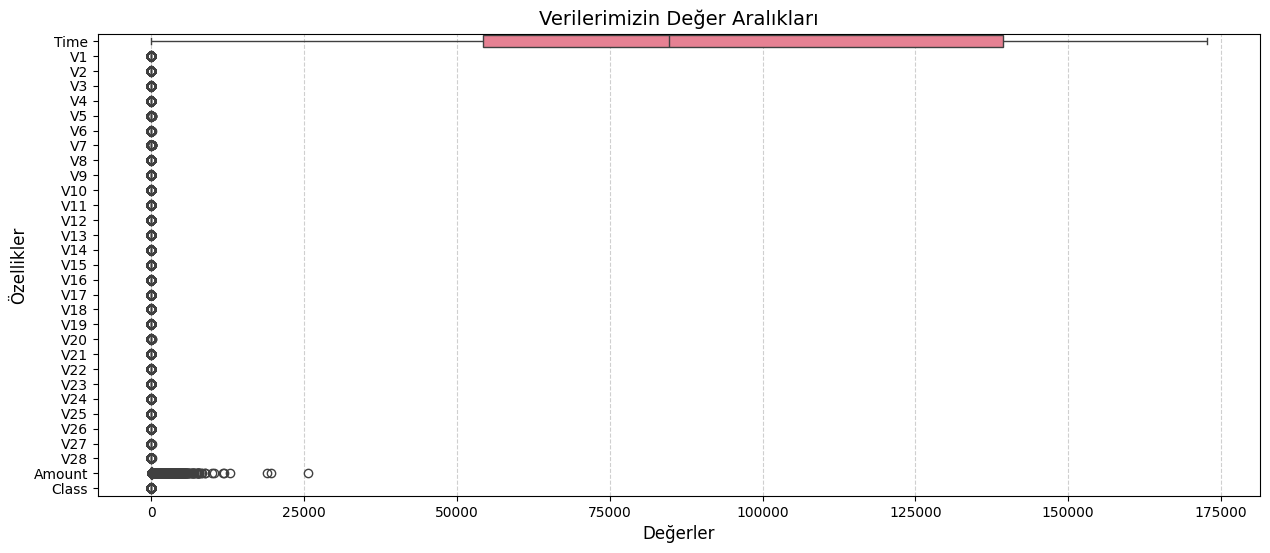

In [14]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, orient="h")
plt.title("Verilerimizin Değer Aralıkları", fontsize=14)
plt.xlabel("Değerler", fontsize=12)
plt.ylabel("Özellikler", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Grafiğe baktığımızda Time ve Amount sütunlarının diğer özelliklere göre çok daha büyük değerlere sahip olduğunu görüyoruz. Örneğin Time sütunu 175.000'e kadar çıkarken, diğer özellikler 0 civarında toplanmıştır.

Makine öğrenmesi algoritmaları, büyük sayısal değerleri daha önemli sanma eğilimindedir. Eğer ölçeklendirme (scaling) yapmazsak, Time ve Amount sütunları diğer özellikleri baskılayarak modelin yanlış öğrenmesine neden olabilir. Bu yüzden, tüm özelliklerin modele eşit katkı sağlaması için bu değerleri aynı aralığa getirmeliyiz.

<Figure size 640x480 with 0 Axes>

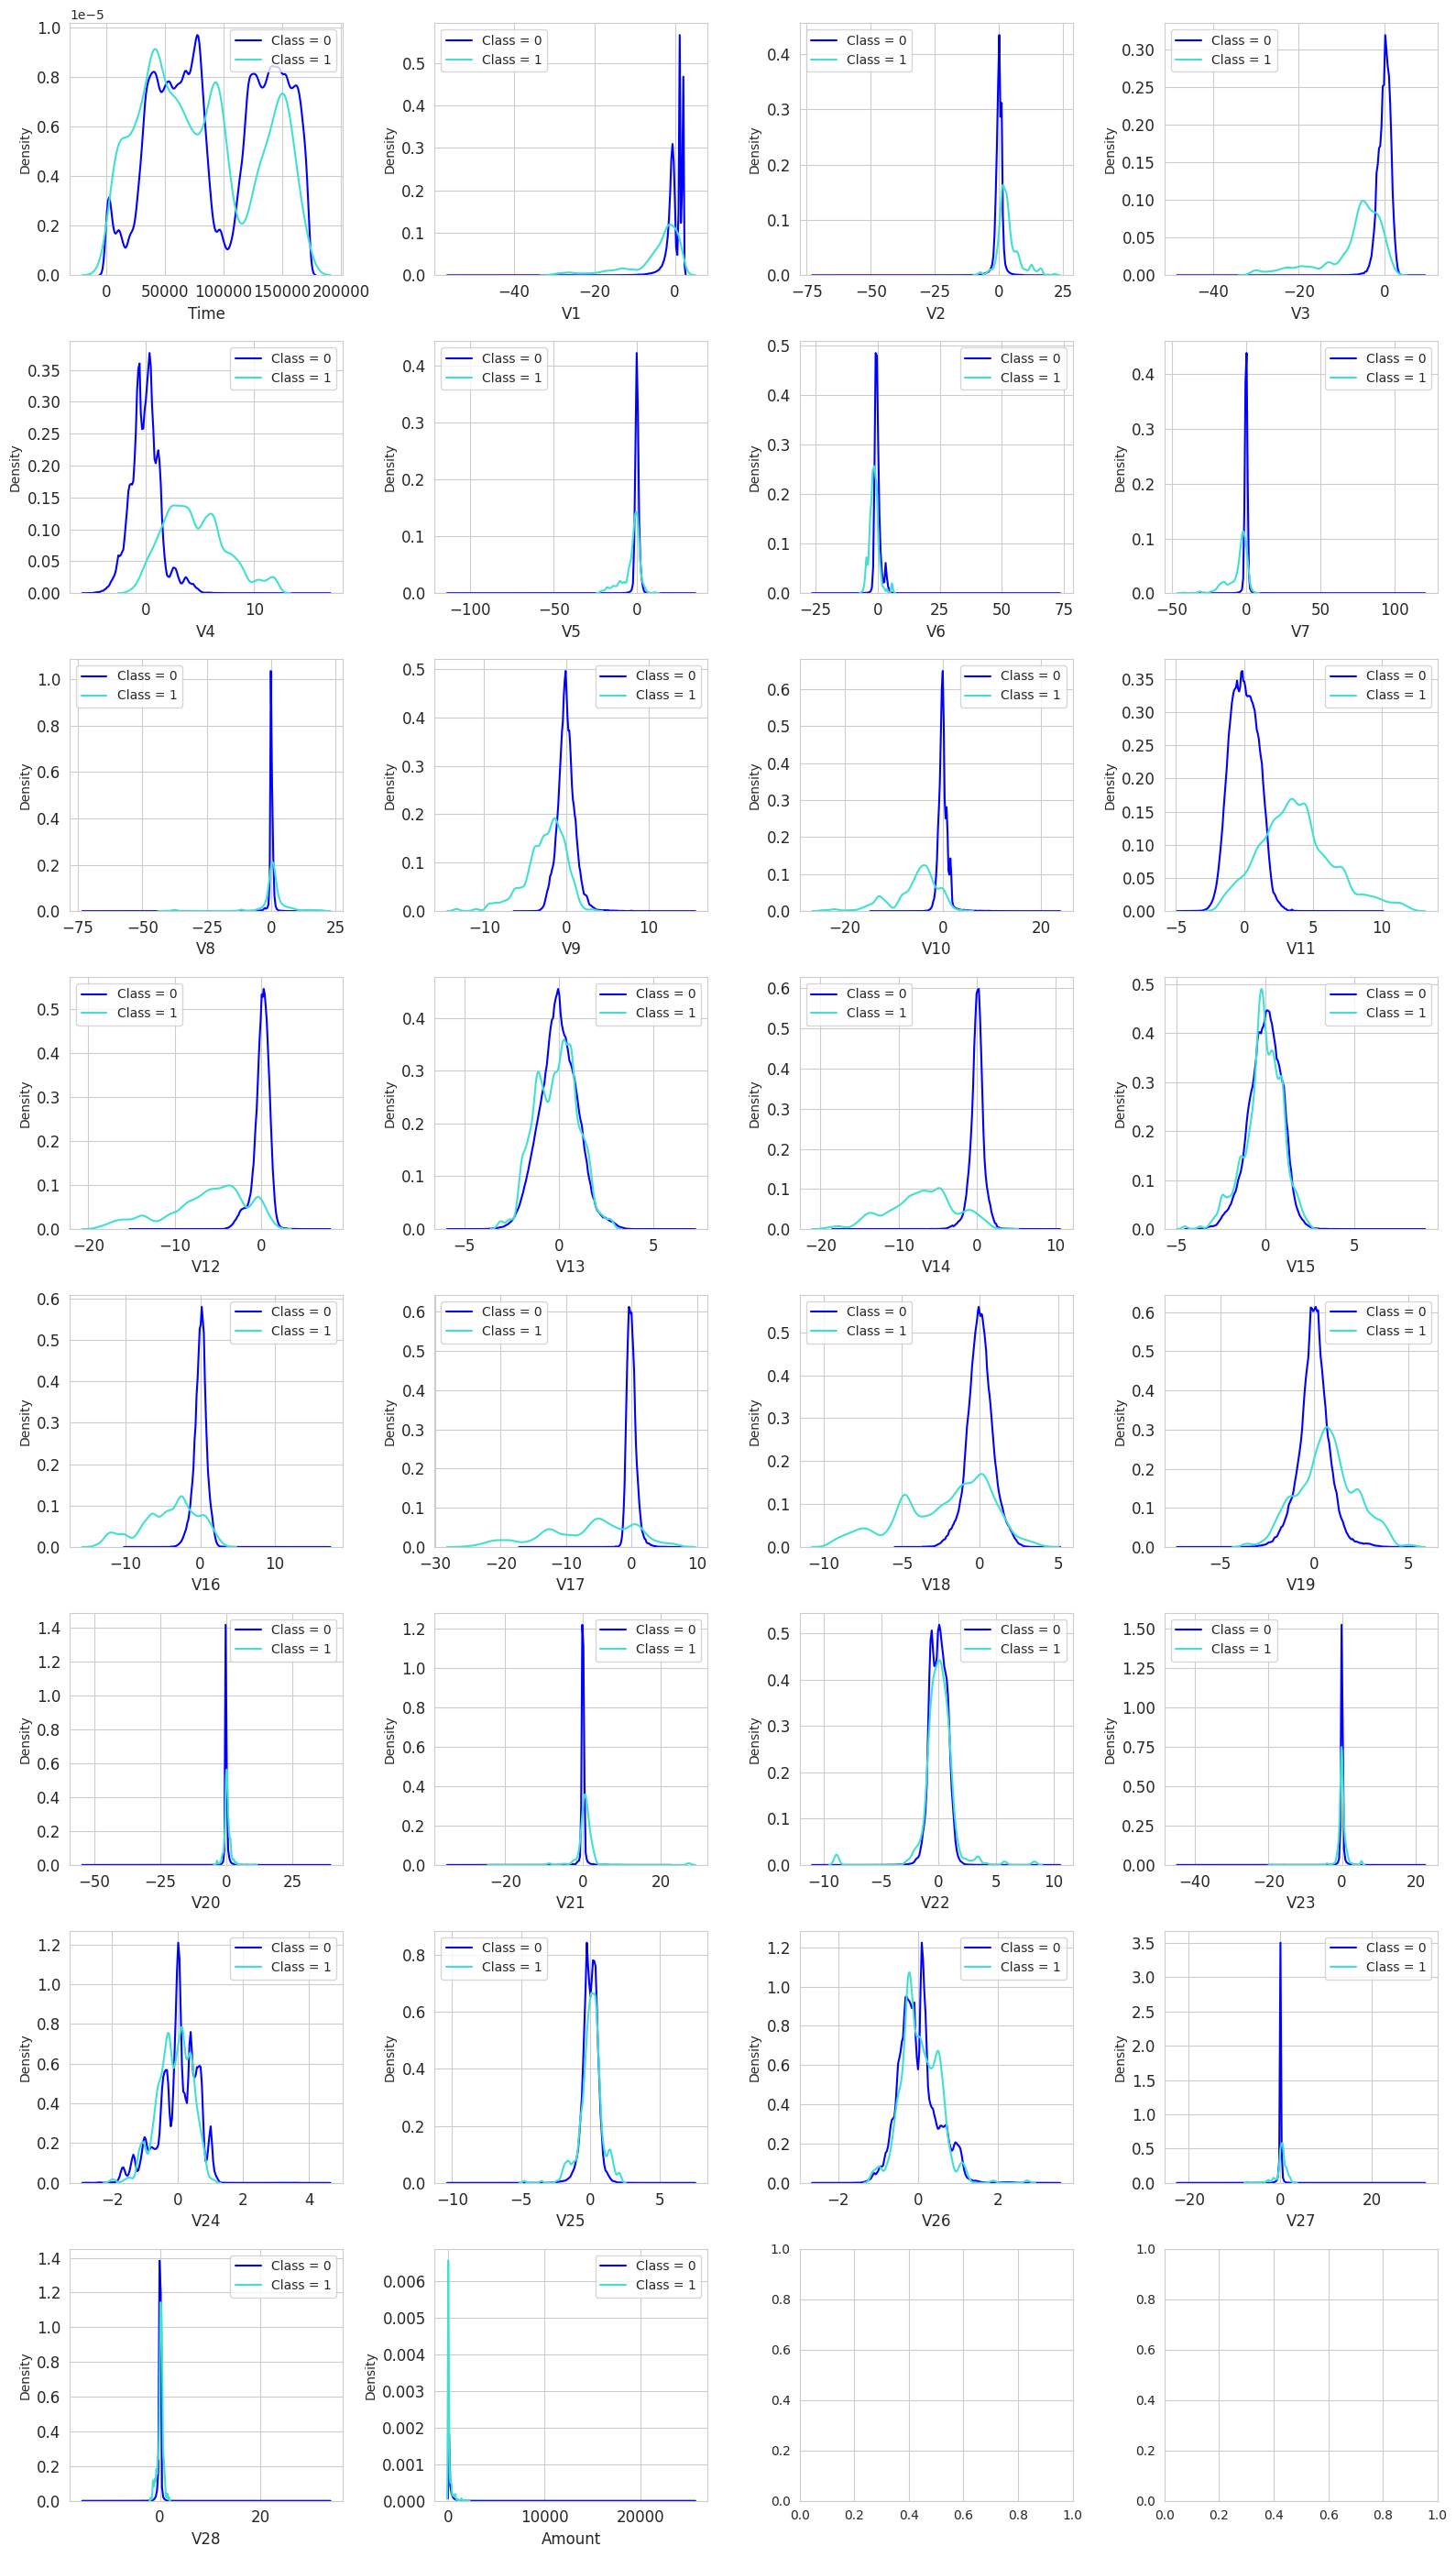

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns

var = [c for c in df.columns if c != 'Class']

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
rows = (len(var) // 4) + 1
fig, ax = plt.subplots(rows, 4, figsize=(16, 28))

for feature in var:
    i += 1
    plt.subplot(rows, 4, i)

    sns.kdeplot(t0[feature], bw_adjust=0.5, label="Class = 0", color='blue')
    sns.kdeplot(t1[feature], bw_adjust=0.5, label="Class = 1", color='turquoise')

    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

    plt.legend()

plt.tight_layout()
plt.show()

Bazı özellikler, dolandırıcılık (1) ve normal (0) işlemleri ayırt etme konusunda oldukça başarılıdır:

En İyi Ayıranlar: Özellikle V4 ve V11, iki sınıfı birbirinden net bir şekilde ayırır.

Kısmen Ayıranlar: V12, V14 ve V18 de belirgin bir ayrım sağlar ancak V4 kadar net değildir.

Ayırt Etmeyenler: V25, V26 ve V28 ise her iki durum için de benzer grafikler çizer, yani bu özellikler dolandırıcılığı tespit etmede pek işe yaramaz.

Normal işlemler genellikle 0 noktası etrafında düzgün bir şekilde toplanırken; dolandırıcılık işlemleri (Time ve Amount hariç) daha düzensiz ve bir tarafa yığılmış (çarpık/asimetrik) bir dağılım gösterir.

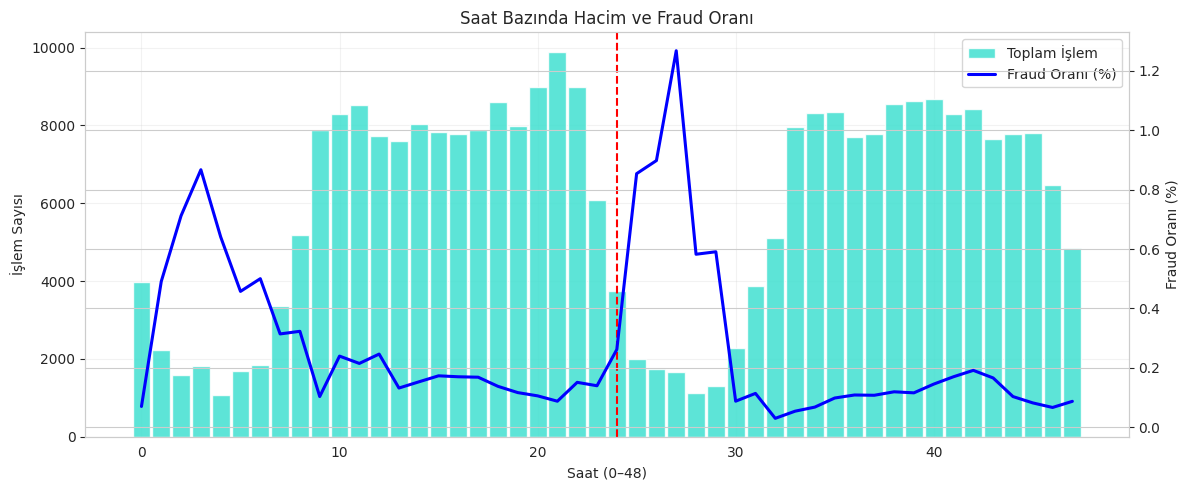

In [16]:

df["Hour"] = (df["Time"] // 3600).astype(int)


g = df.groupby("Hour").agg(
    total=("Class", "size"),
    fraud=("Class", "sum")
).reset_index()
g["rate"] = g["fraud"] / g["total"]
g["rate_smooth"] = g["rate"].rolling(3, center=True, min_periods=1).mean()


fig, ax1 = plt.subplots(figsize=(12,5))
bars = ax1.bar(g["Hour"], g["total"], color="turquoise", alpha=.85, width=.9, label="Toplam İşlem")
ax1.set_ylabel("İşlem Sayısı")
ax1.set_xlabel("Saat (0–48)")
ax1.set_title("Saat Bazında Hacim ve Fraud Oranı")
ax1.axvline(24, color="red", linestyle="--", linewidth=1.5)

ax2 = ax1.twinx()
ax2.plot(g["Hour"], 100*g["rate_smooth"], color="blue", linewidth=2.2, label="Fraud Oranı (%)")
ax2.set_ylabel("Fraud Oranı (%)")

lines = [bars, ax2.lines[0]]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="upper right")

ax1.grid(alpha=.25)
plt.tight_layout()
plt.show()

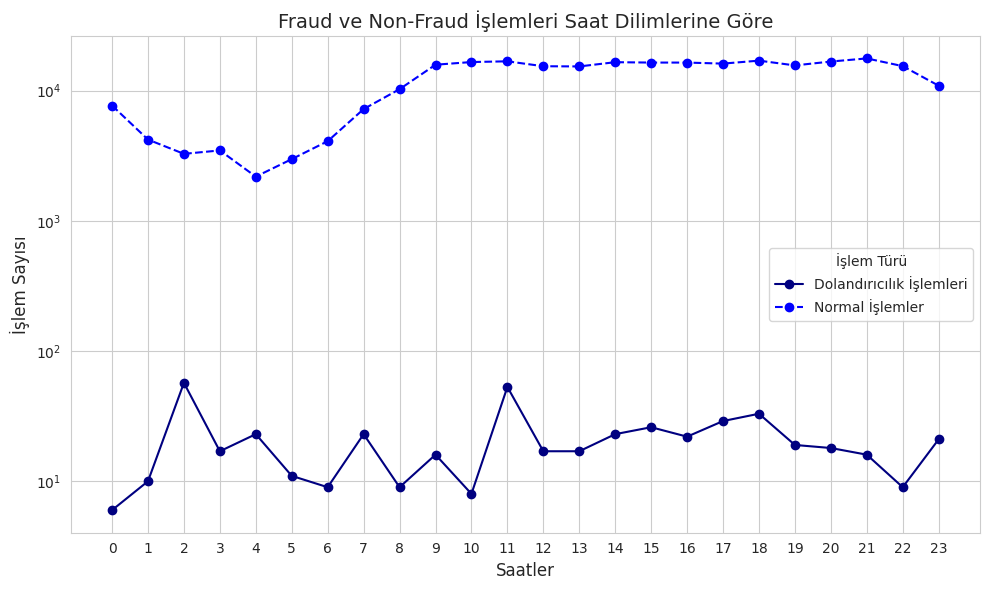

In [17]:

hourly_data = df.copy()
hourly_data['Hour'] = pd.to_datetime(hourly_data['Time'], unit='s').dt.hour

fraud_data = hourly_data[hourly_data['Class'] == 1].groupby('Hour').size()
non_fraud_data = hourly_data[hourly_data['Class'] == 0].groupby('Hour').size()

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_yscale('log')

ax.plot(fraud_data.index, fraud_data.values, '-o', label='Dolandırıcılık İşlemleri', c='navy')

ax.plot(non_fraud_data.index, non_fraud_data.values, '--o', label='Normal İşlemler', c='blue')

ax.set_title('Fraud ve Non-Fraud İşlemleri Saat Dilimlerine Göre', fontsize=14)
ax.set_xlabel('Saatler', fontsize=12)
ax.set_ylabel('İşlem Sayısı', fontsize=12)

ax.grid(True)
plt.xticks(range(24))
plt.legend(title='İşlem Türü')

plt.tight_layout()
plt.show()

Normal işlem sayısı dolandırıcılık işlemlerinden katbekat fazla olduğu için, az sayıdaki dolandırıcılık verisinin grafikte kaybolmasını önlemek amacıyla logaritmik ölçek kullanılmıştır.

Normal İşlemler (Mavi): Gün boyu aktiftir; özellikle mesai saatlerinde (09:00 - 18:00) zirve yapar, gece saatlerinde azalır.

Dolandırıcılık (Mor): Sayıca çok daha azdır. Ancak gece yarısı, sabaha karşı ve saat 11:00 civarında belirgin artışlar gösterir. Bu, dolandırıcıların hem "dikkat çekmeyecekleri" tenha saatleri hem de sistemin yoğun olduğu zamanları seçtiklerini gösterir.

Çıkarım ve Öneri: Bu veriler, güvenlik önlemlerini optimize etmek için kritiktir. Dolandırıcılığın yoğunlaştığı bu riskli saatlerde anomali tespiti algoritmaları daha hassas hale getirilerek koruma güçlendirilmelidir.

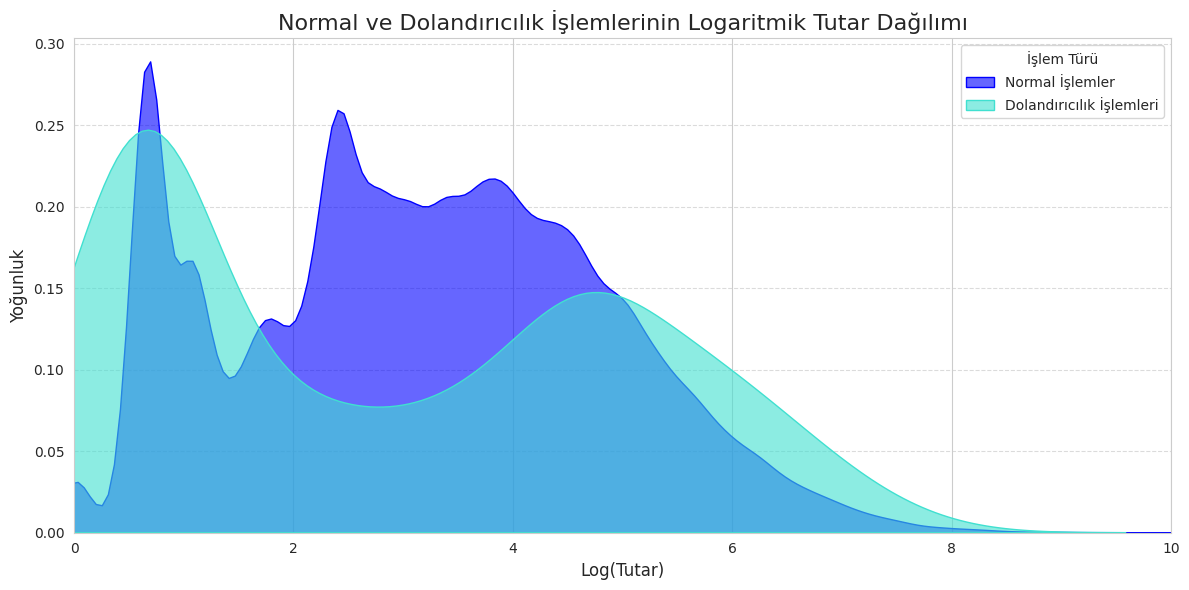

In [18]:

df['Log_Amount'] = np.log1p(df['Amount'])

fraud_amount = df[df['Class'] == 1]['Log_Amount']
non_fraud_amount = df[df['Class'] == 0]['Log_Amount']

plt.figure(figsize=(12, 6))


sns.kdeplot(non_fraud_amount, fill=True, color="blue", label="Normal İşlemler", alpha=0.6)

sns.kdeplot(fraud_amount, fill=True, color="turquoise", label="Dolandırıcılık İşlemleri", alpha=0.6)


plt.title("Normal ve Dolandırıcılık İşlemlerinin Logaritmik Tutar Dağılımı", fontsize=16)
plt.xlabel("Log(Tutar)", fontsize=12)
plt.ylabel("Yoğunluk", fontsize=12)
plt.legend(title="İşlem Türü", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlim(0, 10)

plt.tight_layout()
plt.show()

Gözlemlenen Eğilimler:

Dolandırıcılık (Fraud): Genellikle düşük tutarlarda (Log 0-2 aralığı) yoğunlaşır, yüksek tutarlarda neredeyse hiç görülmez. Bu, dolandırıcıların dikkat çekmemek için sistemi küçük miktarlarla test ettiğini gösterir.

Normal İşlemler: Geniş bir yelpazeye (Log 1-5) yayılır ve orta düzey tutarlarda zirve yapar.

Sonuç: Güvenlik sistemleri özellikle düşük tutarlı işlemlere daha fazla odaklanmalı, orta ve yüksek tutarlar için ise daha spesifik izleme yöntemleri geliştirilmelidir.

##Ölçeklendirme ve Veriyi Ayırma

Kodumuzun bu aşamasında, öncelikle Time ve Amount içeren sütunları ölçeklendireceğiz. Zaman ve tutar da diğer sütunlar gibi ölçeklendirilmelidir. Öte yandan, algoritmalarımızın bir işlemin dolandırıcılık olup olmadığını belirleyen kalıpları daha iyi anlamasına yardımcı olmak için, eşit miktarda Dolandırıcılık ve Normal (Non-Fraud) vaka içeren bir veri çerçevesi alt örneklemi (sub-sample) oluşturmamız gerekiyor.

In [19]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [20]:

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Class,Hour,Log_Amount
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0,5.014760
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0,1.305626
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0,5.939276
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0,4.824306
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0,4.262539


Tutar ve Zaman yeniden ölçeklendirildi

##Veriyi Ayırma (Orijinal Veri Çerçevesi)

Random UnderSampling ve Random OverSampling tekniğine geçmeden önce orijinal veri çerçevesini ayırmamız gerekiyor.
Her ne kadar Rastgele Alt Örnekleme veya Üst Örnekleme tekniklerini uygularken veriyi bölüyor olsak da, modellerimizi bu tekniklerle oluşturulan test setleri üzerinde değil, orijinal test seti üzerinde test etmek istiyoruz.

Temel amaç,  modeli alt örneklenmiş veya üst örneklenmiş veri çerçeveleriyle eğitmek  ve ardından orijinal test seti üzerinde test etmektir.


Yeni Sınıf Dağılımı:
Class
0    284315
1    284315
Name: count, dtype: int64


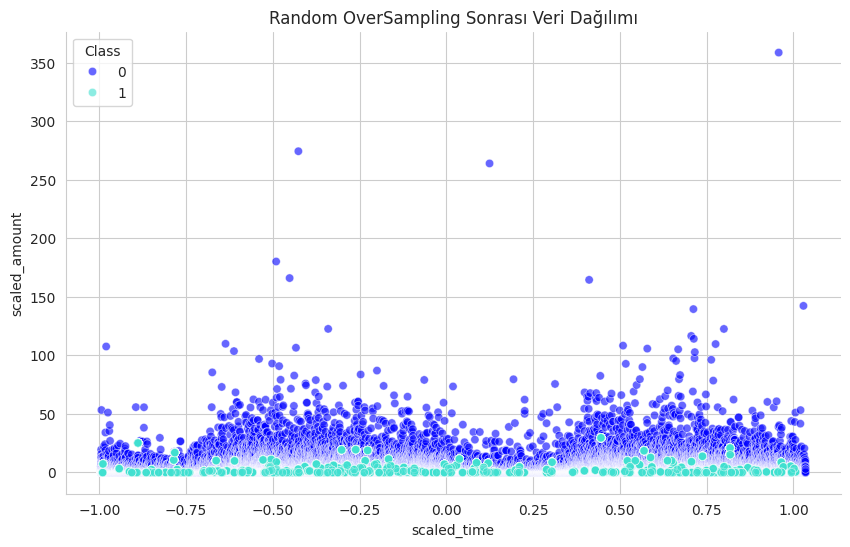

In [21]:
# GEREKLİ KÜTÜPHANE İMPORTU
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Veriyi Hazırla (Tüm özellikleri alıyoruz, sadece 2'sini değil)
# Böylece ileride model kurarken V1, V2 vb. özelliklerini kaybetmemiş olursun.
X = df.drop('Class', axis=1)
y = df['Class']

# 2. Random OverSampling (Rastgele Artırma) İşlemi
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# 3. Sonuçları Tekrar DataFrame Haline Getir (Görselleştirebilmek için)
# X_resampled bir numpy dizisidir, onu sütun isimleriyle birleştiriyoruz
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled

# Dağılımı kontrol et (Eşitlenmiş mi?)
print("Yeni Sınıf Dağılımı:")
print(df_resampled['Class'].value_counts())

# 4. Scatter Plot Oluştur (Sadece Time ve Amount için)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_resampled, x='scaled_time', y='scaled_amount', hue='Class', palette={0: 'blue', 1: 'turquoise'}, alpha=0.6)

plt.title("Random OverSampling Sonrası Veri Dağılımı")
sns.despine()
plt.show()

Yeni Sınıf Dağılımı (Undersampling Sonrası):
Class
0    492
1    492
Name: count, dtype: int64


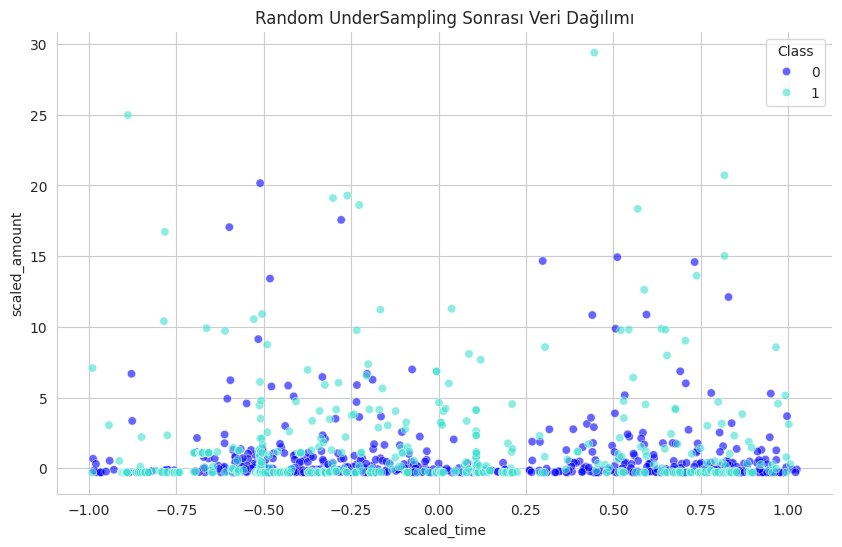

In [22]:
# GEREKLİ KÜTÜPHANE İMPORTU (Bu sefer UnderSampler)
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Veriyi Hazırla
X = df.drop('Class', axis=1)
y = df['Class']

# 2. Random UnderSampling (Rastgele Azaltma) İşlemi
# Bu işlem, normal veri sayısını dolandırıcı sayısına (492) indirecektir.
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 3. Sonuçları Tekrar DataFrame Haline Getir
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled

# Dağılımı kontrol et
print("Yeni Sınıf Dağılımı (Undersampling Sonrası):")
print(df_resampled['Class'].value_counts())

# 4. Scatter Plot Oluştur
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_resampled, x='scaled_time', y='scaled_amount', hue='Class', palette={0: 'blue', 1: 'turquoise'}, alpha=0.6)

plt.title("Random UnderSampling Sonrası Veri Dağılımı")
sns.despine()
plt.show()

1. Grafik (Çoğaltma): Nadir görülen 'fraud' verileri kopyalanarak eşitlenmiştir. Risk: Tekrarlayan veriler modelin ezber yapmasına (overfitting) ve genelleme yeteneğinin düşmesine yol açabilir.

2. Grafik (Azaltma): Fazla olan 'normal' işlemler rastgele silinerek sayıları 'fraud' verisine indirilmiş ve denge sağlanmıştır.

Sonuç: Hangi yöntemin seçileceği veriye bağlıdır. Temel hedef, dengesizliği yok ederek modelin doğruluğunu artırmaktır.

##Dengelenmemiş Veri ile Logistic Regression

In [23]:
# Özellik ve hedef değişkeni seçme
X = df.drop(columns=['Class'])  # Tahmin edilecek sınıf harici tüm kolonlar
y = df['Class']

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression modeli
logistic_model = LogisticRegression(max_iter=6000, solver='saga')
logistic_model.fit(X_train, y_train)

# Test seti üzerinde tahmin
y_pred = logistic_model.predict(X_test)

accuricy = logistic_model.score(X_train,y_train)
print (f"Model doğruluk skoru= {accuricy}")

Model doğruluk skoru= 0.9991824000321021


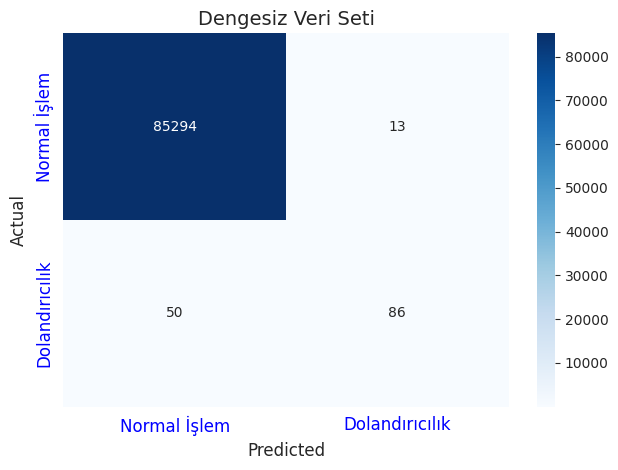

In [24]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    # Eksenler için etiketler
    class_names = ['Normal İşlem', 'Dolandırıcılık']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)

    plt.title(title, fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)

    plt.xticks(fontsize=12, color="blue")
    plt.yticks(fontsize=12, color="blue")

    plt.tight_layout()
    plt.show()

# Grafik çizim
plot_confusion_matrix(y_test, y_pred, "Dengesiz Veri Seti")


1. Yüksek Doğruluk (Accuracy) Yanılsaması
Modelimiz **0.9992 (%99.92)** gibi mükemmel görünen bir doğruluk skoruna sahiptir. Ancak veri seti dengesiz olduğu için bu skor yanıltıcıdır. Model, sadece "Normal" diyerek bile bu skoru elde edebilir çünkü veri setinin %99'u zaten normal işlemlerden oluşmaktadır.

2. Confusion Matrix Gerçeği
Sayılar modelin asıl başarısızlığını ortaya koymaktadır:

* Normal İşlemler (Çoğunluk): Model, 85.307 işlemin 85.294'ünü doğru bilmiştir. Bu, skoru yapay olarak şişiren kısımdır.
* Dolandırıcılık (Azınlık): Toplam 136 dolandırıcılık vakasının 53 tanesini (FN) kaçırmış, sadece 83 tanesini doğru tespit edebilmiştir.

3. Temel Sorun ve Çözüm
Model, çoğunluk sınıfını (Normal) tanımada çok başarılıyken, asıl hedefimiz olan azınlık sınıfını (Dolandırıcılık) tespit etmekte yetersiz kalmıştır.

* Sonuç: Dengesiz veri setlerinde Accuracy (Doğruluk) güvenilir bir metrik değildir.
* Modelin gerçek performansını ölçmek için Precision (Kesinlik), Recall (Duyarlılık) ve F1-Score metriklerine odaklanılmalıdır.

In [25]:

logistic_model.score(X_train,y_train)
print("Dengesiz veri seti sonuçları:")
print(classification_report(y_test, y_pred, target_names=['Normal işlem','Dolandırıcılık']))

Dengesiz veri seti sonuçları:
                precision    recall  f1-score   support

  Normal işlem       1.00      1.00      1.00     85307
Dolandırıcılık       0.87      0.63      0.73       136

      accuracy                           1.00     85443
     macro avg       0.93      0.82      0.87     85443
  weighted avg       1.00      1.00      1.00     85443



1. Precision (Kesinlik)
Tanım: "Modelin 'Bu bir dolandırıcılıktır' dediği işlemlerin yüzde kaçı gerçekten dolandırıcılıktır?" sorusunun cevabıdır. Yanlış alarm (False Positive) oranını ölçer.

(0.87): Modelin bir işleme "Dolandırıcılık" dediğinde, %87 oranında haklı çıkıyor. Bu oldukça iyi bir oran; yani model çok fazla yanlış alarm vermiyor.

2. Recall (Duyarlılık / Yakalama)
Tanım: "Gerçekte var olan dolandırıcılıkların yüzde kaçını tespit edebildik?" sorusunun cevabıdır. Gözden kaçanları (False Negative) ölçer. Dolandırıcılık tespitinde genellikle en önemli metrik budur.

(0.63): İşte burası kritik. Modelin, gerçek dolandırıcılıkların sadece %63'ünü yakalayabilmiş. Geriye kalan %37'lik kısmı (dolandırıcıları) kaçırmış ve onlara "Normal İşlem" demiş. Bu, finansal bir sistem için ciddi bir risktir.

3. F1-Score
Tanım: Precision ve Recall değerlerinin harmonik ortalamasıdır. İki değer arasında bir denge kurar. Tek bir sayı ile başarıyı ölçmek istediğimizde buna bakarız.

(0.73): Normal işlemler için 1.00 iken dolandırıcılık için 0.73 olması, modelin dolandırıcılık sınıfında zorlandığını gösteriyor.

4. Support (Destek)
Tanım: Test veri setinde o sınıfa ait kaç adet gerçek örnek olduğunu gösterir.


Normal İşlem: 85.307 adet (Verinin ezici çoğunluğu).

Dolandırıcılık: 136 adet (Çok azınlıkta).

Yorum: Bu sayılar veri setinin ne kadar dengesiz (imbalanced) olduğunu kanıtlıyor.

5. Accuracy (Doğruluk)
Tanım: Toplam doğru tahminlerin tüm tahminlere oranı.

(1.00): %99 üzeri bir doğruluk görünüyor ama bu yanıltıcıdır. Çünkü model her şeye "Normal" dese bile zaten %99.8 doğruluk elde ederdi. Dolandırıcılıkları kaçırmasına rağmen skorun bu kadar yüksek çıkması, dengesiz veri setlerinin tuzağıdır.

6. Macro avg & Weighted avg
Macro avg (0.82 Recall): Sınıfların ağırlığına bakmadan (sayıca az olsalar bile) iki sınıfın başarısının ortalamasını alır. Dolandırıcılık sınıfındaki düşüşü (0.63) daha net yansıtır.

Weighted avg (1.00 Recall): Sınıf sayılarına göre ağırlıklı ortalama alır. Normal işlem sayısı çok fazla olduğu için bu skor her zaman yüksek çıkar ve yanıltıcı olabilir.

## Oversampling ile Logistic Regression

In [26]:

from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

unique, count = np.unique(y_train_smote, return_counts=True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}

print("SMOTE Sonrası Sınıf Dağılımı:", y_train_smote_value_count)

SMOTE Sonrası Sınıf Dağılımı: {np.int64(0): np.int64(199008), np.int64(1): np.int64(199008)}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


--- SMOTE Sonrası Model Performansı ---

Test Seti Doğruluk (Accuracy) Skoru: 0.9759

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.93      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



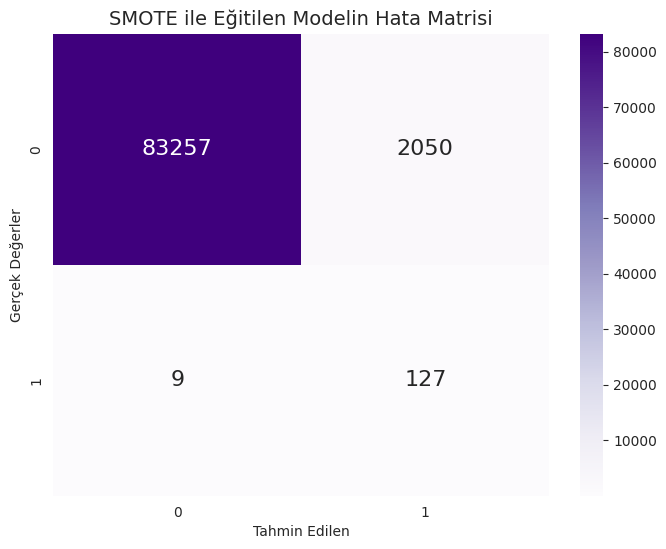

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Modeli Kur ve Eğit (SMOTE verisiyle)
model_smote = LogisticRegression(solver='saga', max_iter=6000, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# 2. Tahmin Yap (GERÇEK Test Seti Üzerinde)
y_pred_smote = model_smote.predict(X_test)

# 3. Sonuçları Raporla
print("--- SMOTE Sonrası Model Performansı ---\n")
print(f"Test Seti Doğruluk (Accuracy) Skoru: {accuracy_score(y_test, y_pred_smote):.4f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_smote))

# 4. Confusion Matrix Görselleştirme
cm = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', annot_kws={"size": 16})
plt.title('SMOTE ile Eğitilen Modelin Hata Matrisi', fontsize=14)
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen')
plt.show()



Yüksek Recal: Modelimiz artık çok daha şüpheci. Eskiden 53 dolandırıcıyı gözden kaçırırken, şimdi sadece 10 tanesini kaçırmış. Asıl hedefimiz olan dolandırıcılığı yakalama konusunda büyük bir başarı elde edilmiştir.

Düşük Accuracy: Doğruluk oranının düşmesinin sebebi, modelin güvenlik duvarını yükseltmesidir. Model, "Ne olur ne olmaz" diyerek 2210 normal işleme de şüpheyle yaklaşmış (False Positive) ve alarm vermiştir.

Sonuç: Bir banka için dolandırıcıya para kaptırmaktansa, müşteriye yanlışlıkla "Bu işlem sizin mi?" diye sormak (yanlış alarm) çok daha kabul edilebilir bir durumdur.

In [28]:
# Performans değerlendirme
print("SMOTE ile dengeleme sonuçları:")
print(classification_report(y_test, y_pred_smote, target_names=['Normal işlem', 'Dolandırıcılık']))

SMOTE ile dengeleme sonuçları:
                precision    recall  f1-score   support

  Normal işlem       1.00      0.98      0.99     85307
Dolandırıcılık       0.06      0.93      0.11       136

      accuracy                           0.98     85443
     macro avg       0.53      0.95      0.55     85443
  weighted avg       1.00      0.98      0.99     85443



SMOTE ile dengelenmiş veriyle eğitilen modelde genel doğruluk %94,7 iken, Confusion Matrix’ten görülen %97 doğruluk çoğunluk (normal işlem) sınıfındaki başarılı tahminlerden kaynaklanmaktadır ve yanıltıcı olabilir.

Dolandırıcılık sınıfında modelin recall değeri çok yüksek (%93) olduğu için dolandırıcılık işlemlerinin büyük kısmı yakalanmaktadır.

Buna karşılık precision değerinin düşük olması (%5), çok sayıda yanlış pozitif (false alarm) üretildiğini göstermektedir.

SMOTE, azınlık sınıfının tespit edilmesini güçlendirmiş; ancak bunun bedeli olarak yanlış pozitif oranı artmıştır.

--- Random Under-Sampling Sonuçları ---
Eğitim Seti Doğruluğu: 0.9522
Test Seti Doğruluğu: 0.9625

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443



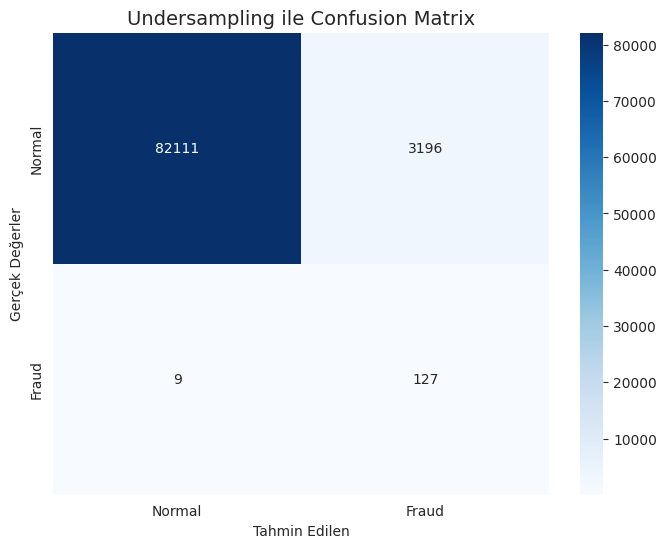

In [29]:
from sklearn.metrics import classification_report

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

model_under = LogisticRegression(solver='saga', max_iter=6000, random_state=42)
model_under.fit(X_train_under, y_train_under)

y_pred_under = model_under.predict(X_test)

print("--- Random Under-Sampling Sonuçları ---")
print(f"Eğitim Seti Doğruluğu: {model_under.score(X_train_under, y_train_under):.4f}")
print(f"Test Seti Doğruluğu: {model_under.score(X_test, y_test):.4f}")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_under))

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Fraud'],
                yticklabels=['Normal', 'Fraud'])
    plt.title(title, fontsize=14)
    plt.ylabel('Gerçek Değerler')
    plt.xlabel('Tahmin Edilen')
    plt.show()

plot_confusion_matrix(y_test, y_pred_under, "Undersampling ile Confusion Matrix")

In [30]:

print("SMOTE ile dengeleme sonuçları:")
print(classification_report(y_test, y_pred_smote, target_names=['Normal işlem', 'Dolandırıcılık']))

SMOTE ile dengeleme sonuçları:
                precision    recall  f1-score   support

  Normal işlem       1.00      0.98      0.99     85307
Dolandırıcılık       0.06      0.93      0.11       136

      accuracy                           0.98     85443
     macro avg       0.53      0.95      0.55     85443
  weighted avg       1.00      0.98      0.99     85443



SMOTE ile dengelenmiş veriyle eğitilen modelde görülen yüksek doğruluk oranı, çoğunluk sınıfındaki başarılı tahminlerden kaynaklanmakta ve yanıltıcı olabilmektedir. Model, dolandırıcılık işlemlerinin büyük kısmını yakalayabilmesine rağmen (yüksek recall), düşük precision değeri nedeniyle çok sayıda yanlış alarm üretmektedir. SMOTE, dolandırıcılık sınıfını tespit etme kabiliyetini artırmış; ancak buna karşılık yanlış pozitif oranının yükselmesine neden olmuştur.

## Under-Sampling ile Logistic Regression

In [31]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)


model_under = LogisticRegression(solver='saga', max_iter=6000, random_state=42)
model_under.fit(X_train_under, y_train_under)


y_pred_under = model_under.predict(X_test)
accuricy_under = model_under.score(X_train_under,y_train_under)
print (f"Model doğruluk skoru= {accuricy_under}")

Model doğruluk skoru= 0.952247191011236


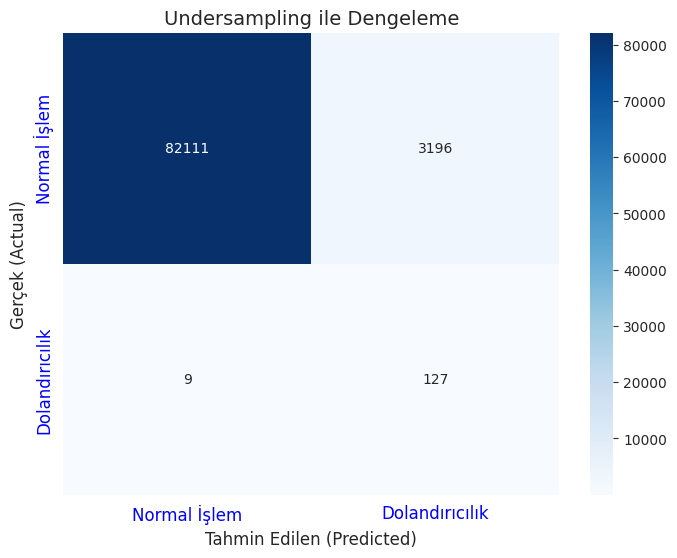

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

matplotlib.rcParams['text.usetex'] = False

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal İşlem', 'Dolandırıcılık'],
                yticklabels=['Normal İşlem', 'Dolandırıcılık'])

    plt.title(title, fontsize=14)
    plt.xlabel('Tahmin Edilen (Predicted)', fontsize=12)
    plt.ylabel('Gerçek (Actual)', fontsize=12)

    plt.xticks(fontsize=12, color="blue")
    plt.yticks(fontsize=12, color="blue")

    plt.show()

plot_confusion_matrix(y_test, y_pred_under, "Undersampling ile Dengeleme")

In [33]:
print("Undersampling ile dengeleme sonuçları:")
print(classification_report(y_test, y_pred_under))

Undersampling ile dengeleme sonuçları:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443



Undersampling yöntemi, dolandırıcılık sınıfını yakalama başarısını yüksek tutmuş (recall ≈ %93) ancak çok düşük precision değeri (%4) nedeniyle yoğun yanlış alarm üretmiştir. Çoğunluk sınıfının azaltılması, azınlık sınıfının daha iyi temsil edilmesini sağlasa da veri setinin küçülmesi modelin genelleme kabiliyetini ve genel doğruluğunu olumsuz etkilemiştir.

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

Accuracy Score: 0.999602073897218
Confusion Matrix:
 [[85290    17]
 [   17   119]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.88      0.88       136

    accuracy                           1.00     85443
   macro avg       0.94      0.94      0.94     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9874


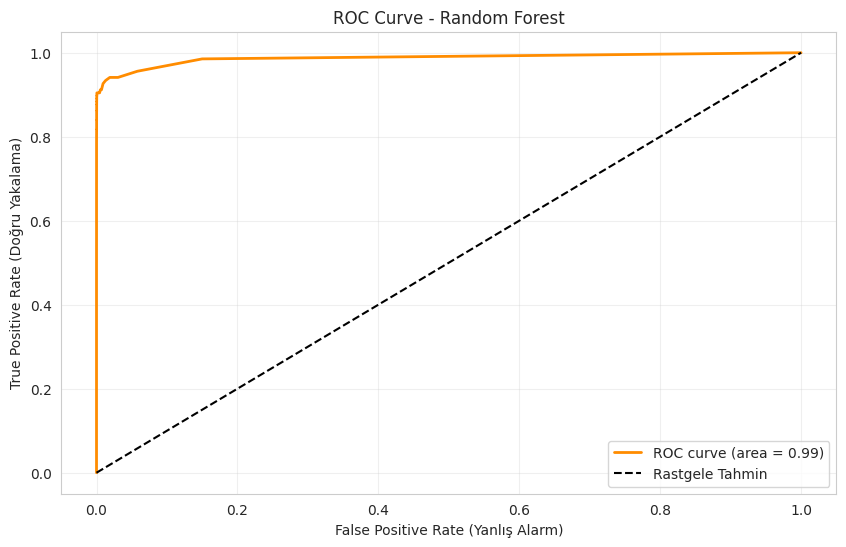

In [40]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC-AUC Score: {auc_rf:.4f}")


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f"ROC curve (area = {auc_rf:.2f})", color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], "k--", label="Rastgele Tahmin") # Şans çizgisi
plt.xlabel("False Positive Rate (Yanlış Alarm)")
plt.ylabel("True Positive Rate (Doğru Yakalama)")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

Random Forest modeli, yüksek ROC-AUC skoru ile dolandırıcılık ve normal işlemler arasında güçlü bir ayrım yapabilmektedir. Dengesiz veri yapısına rağmen her iki sınıfta da başarılı sonuçlar elde edilmiş, özellikle dolandırıcılık tespitinde etkili bir performans sergilenmiştir. Ancak dolandırıcılık sınıfında recall değerinin 0.88 olması, bazı dolandırıcılık işlemlerinin kaçırılabildiğini ve modelin daha da iyileştirilebileceğini göstermektedir.

##SVM

SVM Modeli eğitiliyor... (Biraz sabır, bu işlem sürebilir)
İşlem tamamlandı, grafik çiziliyor...


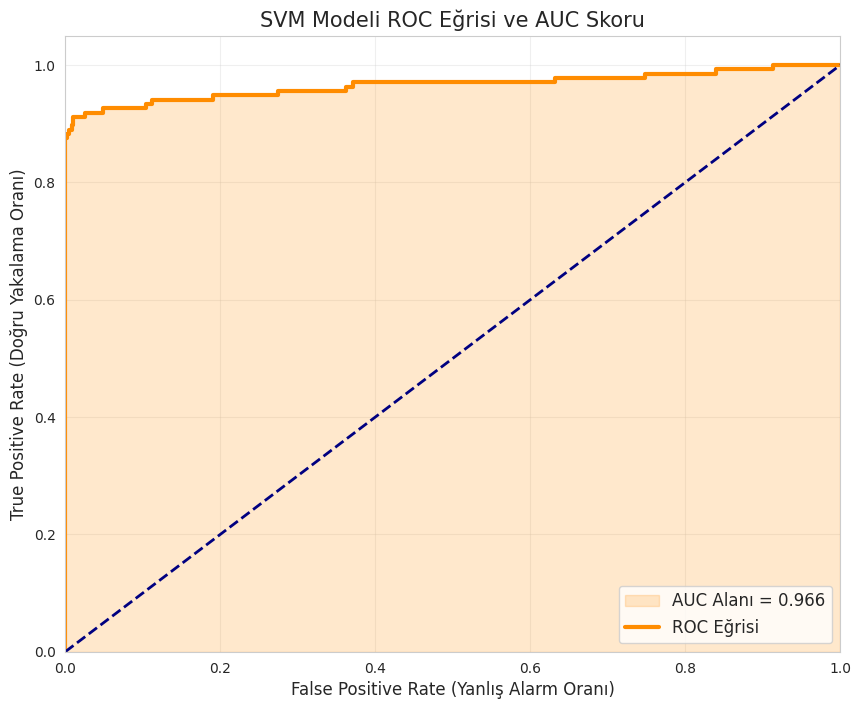

In [36]:
# GEREKLİ TÜM KÜTÜPHANELERİ ÇAĞIRIYORUZ
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Veriyi Hazırlama ve Ölçeklendirme (SVM için şarttır)
scaler = StandardScaler()
# X_train ve X_test verilerinin hafızada olduğunu varsayıyoruz
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Modeli Kurma ve Eğitme (Probability=True dedik ki ROC çizilebilsin)
print("SVM Modeli eğitiliyor... (Biraz sabır, bu işlem sürebilir)")
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 3. Olasılık Değerlerini Hesaplama (İşte eksik olan parça buydu!)
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# 4. ROC Eğrisini Çizme (Görselleştirme)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))

# Altı dolu alan
plt.fill_between(fpr, tpr, alpha=0.2, color='darkorange', label=f'AUC Alanı = {roc_auc:.3f}')

# Ana çizgi
plt.plot(fpr, tpr, color='darkorange', lw=3, label='ROC Eğrisi')

# Şans çizgisi
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Eksen ayarları
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Yanlış Alarm Oranı)', fontsize=12)
plt.ylabel('True Positive Rate (Doğru Yakalama Oranı)', fontsize=12)
plt.title('SVM Modeli ROC Eğrisi ve AUC Skoru', fontsize=15)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

print("İşlem tamamlandı, grafik çiziliyor...")
plt.show()

SVM modeli dolandırıcılık tespitinde iyi bir performans sergilese de, Random Forest modeline kıyasla daha zayıf kalmaktadır. ROC-AUC skorunun 0.96 olması sınıflar arası ayrımın güçlü olduğunu gösterirken, recall değerinin 0.68’de kalması SVM’nin dolandırıcılık işlemlerinin bir kısmını kaçırdığını ortaya koymaktadır. Bu nedenle, dolandırıcılığı daha yüksek oranda yakalayan ve daha dengeli sonuçlar sunan Random Forest modeli genel olarak daha başarılıdır.

## KNN

In [41]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Yeni X_train_smote boyutu:", X_train_smote.shape)
print("Yeni y_train_smote boyutu:", y_train_smote.shape)


Yeni X_train_smote boyutu: (398016, 32)
Yeni y_train_smote boyutu: (398016,)


Accuracy: 0.9972613321161476
Confusion Matrix:
 [[85088   219]
 [   15   121]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.36      0.89      0.51       136

    accuracy                           1.00     85443
   macro avg       0.68      0.94      0.75     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9441692944307032


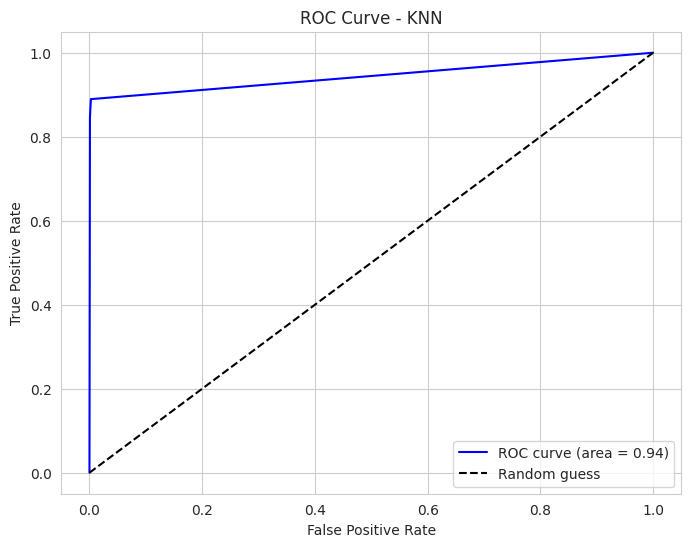

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
knn.fit(X_train_smote, y_train_smote)


y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

roc_auc = roc_auc_score(y_test, y_pred_proba_knn)
print("ROC-AUC Score:", roc_auc)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label="ROC curve (area = %0.2f)" % auc_knn, color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.show()

KNN modeli genel doğruluk ve dolandırıcılık sınıfında yüksek recall (0.90) değerine sahip olsa da, düşük precision (0.41) ve F1-score (0.56) nedeniyle çok sayıda yanlış pozitif üretmektedir. ROC-AUC skorunun 0.95 olması sınıflar arası ayrımın iyi olduğunu gösterse de, Random Forest ve SVM modellerinin gerisinde kalmaktadır. Bu nedenle KNN, dolandırıcılığı yakalama konusunda başarılı olsa bile yüksek yanlış alarm oranı nedeniyle pratik kullanımda güvenilirliği sınırlıdır.

##Sonuç

analizler sonucunda, en uygun modelin Random Forest olduğunu belirledik.